## Project background
In this project, you'll work as a data scientist for an investment firm that is interested in investing in the Initial Public Offerings (IPO) in the Indian market. Your task is to build a deep learning classification model to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

**Data Dictionary
The data consists of following columns:

* `Date`: date when the IPO was listed

* `IPOName`: name of the IPO

* `Issue_Size`: size of the IPO issue, in INR Crores

* `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

* `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

* `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

* `Subscription_Total`: total number of times the IPO was subscribed overall

* `Issue_Price`: the price in INR at which the IPO was issued

* `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

### Read data

In [2]:
link ='https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true'
data = pd.read_html(link)[0]
data.head()

Unnamed: 0_level_0    Issue Details                                  \
                Date         IPO Name Profile Issue Size  (in crores)   
0           06-10-23  Valiant Laborat    View                  152.46   
1           04-10-23  Updater Service    View                  640.00   
2           03-10-23       JSW Infra.    View                 2800.00   
3           03-10-23  Manoj Vaibhav G    View                  270.20   
4           28-09-23     Yatra Online    View                  775.00   

  Subscription                      Price                             \
           QIB    HNI   RII  Total  Issue Listing Open Listing Close   
0         7.64  24.80  6.02  10.50  140.0       170.50        169.05   
1         0.39   0.06  0.52   0.32  300.0       283.05        283.85   
2        18.93   5.11  4.69  12.57    0.0       165.50        157.30   
3         0.00   0.29  0.29   0.28  215.0       215.00        215.65   
4         0.82   0.07  1.16   0.68  142.0       136.05        135.95   

                                               
  Listing Gains(%)     CMP Current  Gains (%)  
0            20.75  167.50              19.64  
1            -5.38  280.00              -6.67  
2             0.00  162.85                NaN  
3             0.30  237.50              10.47  
4            -4.26  137.50              -3.17

In [3]:
data.columns

MultiIndex([('Unnamed: 0_level_0',                    'Date'),
            (     'Issue Details',                'IPO Name'),
            (     'Issue Details',                 'Profile'),
            (     'Issue Details', 'Issue Size  (in crores)'),
            (      'Subscription',                     'QIB'),
            (      'Subscription',                     'HNI'),
            (      'Subscription',                     'RII'),
            (      'Subscription',                   'Total'),
            (             'Price',                   'Issue'),
            (             'Price',            'Listing Open'),
            (             'Price',           'Listing Close'),
            (             'Price',        'Listing Gains(%)'),
            (             'Price',                     'CMP'),
            (             'Price',      'Current  Gains (%)')],
           )

In [4]:
data.columns = data.columns.droplevel(0)

In [5]:
data.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
0,06-10-23,Valiant Laborat,View,152.46,7.64,24.80,6.02,10.50,140.0,170.50,169.05,20.75,167.50,19.64
1,04-10-23,Updater Service,View,640.00,0.39,0.06,0.52,0.32,300.0,283.05,283.85,-5.38,280.00,-6.67
2,03-10-23,JSW Infra.,View,2800.00,18.93,5.11,4.69,12.57,0.0,165.50,157.30,0.00,162.85,NaN
3,03-10-23,Manoj Vaibhav G,View,270.20,0.00,0.29,0.29,0.28,215.0,215.00,215.65,0.30,237.50,10.47
4,28-09-23,Yatra Online,View,775.00,0.82,0.07,1.16,0.68,142.0,136.05,135.95,-4.26,137.50,-3.17


In [6]:
df = data[['Date', 'IPO Name', 'Issue Size  (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue', 'Listing Gains(%)']]

In [7]:
df = df.rename(columns={'Issue':'Issue_price'})

In [8]:
df.tail()

,Date,IPO Name,Issue Size (in crores),QIB,HNI,RII,Total,Issue_price,Listing Gains(%)
358,19-02-10,Thangamayil,28.76,0.52,1.52,2.26,1.12,75.0,-52.60
359,15-02-10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75.0,17.13
360,15-02-10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165.0,-11.28
361,08-02-10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145.0,-84.21
362,03-02-10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165.0,11.82


In [9]:
df.shape

(363, 9)

In [10]:
df.describe()

,Issue Size (in crores),QIB,HNI,RII,Total,Issue_price,Listing Gains(%)
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,1169.708760,24.579394,62.654022,8.162342,25.229807,371.143251,3.557383
std,2256.654841,39.059909,135.078256,13.956733,46.271107,343.120449,44.411218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,193.580000,1.130000,1.130000,1.160000,1.570000,122.500000,-10.990000
50%,517.600000,4.940000,4.840000,3.310000,4.930000,252.000000,2.270000
75%,1107.000000,32.235000,47.170000,8.505000,28.440000,530.500000,23.510000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,185.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     363 non-null    object 
 1   IPO Name                 363 non-null    object 
 2   Issue Size  (in crores)  363 non-null    float64
 3   QIB                      363 non-null    float64
 4   HNI                      363 non-null    float64
 5   RII                      363 non-null    float64
 6   Total                    363 non-null    float64
 7   Issue_price              363 non-null    float64
 8   Listing Gains(%)         363 non-null    float64
dtypes: float64(7), object(2)
memory usage: 25.6+ KB


In [12]:
df['Listing Gains(%)'].describe()

count    363.000000
mean       3.557383
std       44.411218
min      -97.150000
25%      -10.990000
50%        2.270000
75%       23.510000
max      185.000000
Name: Listing Gains(%), dtype: float64

In [13]:
# Missing data
df.isnull().sum()

Date                       0
IPO Name                   0
Issue Size  (in crores)    0
QIB                        0
HNI                        0
RII                        0
Total                      0
Issue_price                0
Listing Gains(%)           0
dtype: int64

In [14]:
df[df.columns[df.dtypes != 'object']].skew()

Issue Size  (in crores)    5.066589
QIB                        2.220162
HNI                        3.323158
RII                        3.791562
Total                      3.124355
Issue_price                1.700528
Listing Gains(%)           0.311667
dtype: float64

In [15]:
# Make the listing garins into binary 0 or 1

df.loc[:, 'Listing Gains(%)'] = df['Listing Gains(%)'].apply(lambda x: 1 if x>0 else 0)

In [16]:
df['Listing Gains(%)'].value_counts(normalize=True)*100

Listing Gains(%)
1.0    55.096419
0.0    44.903581
Name: proportion, dtype: float64

54.97% of the IPOs has a profit

### Data Visualization

<Axes: xlabel='Listing Gains(%)', ylabel='count'>

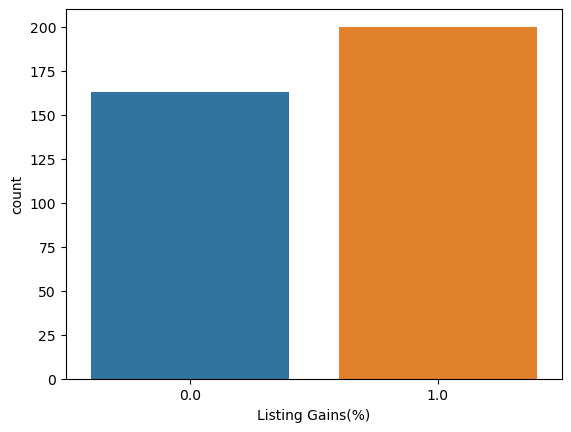

In [17]:
sns.countplot(df, x='Listing Gains(%)')

[Text(0.5, 1.0, 'Issue Price Histogram'), Text(0.5, 0, 'Issue Price')]

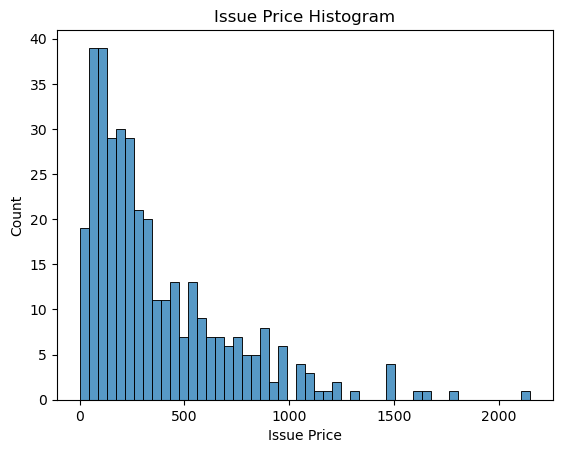

In [18]:
sns.histplot(data=df, x='Issue_price', bins=50).set(title='Issue Price Histogram', xlabel='Issue Price')

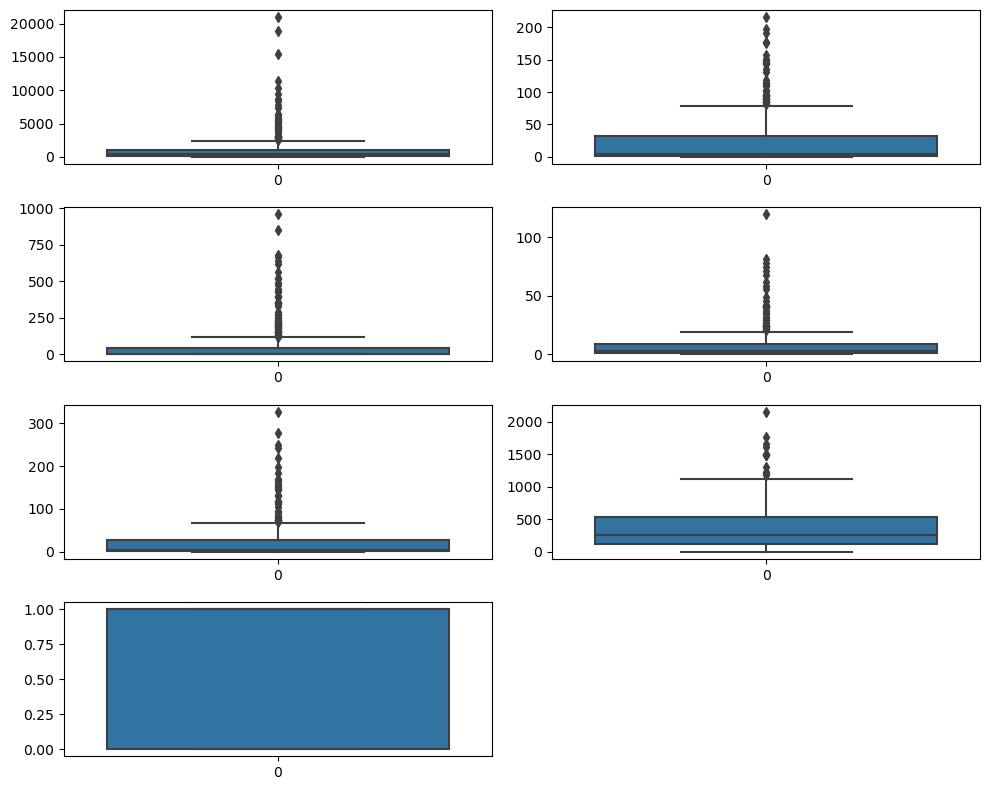

In [19]:
fig = plt.figure(figsize=(10, 8))

for i, col in enumerate(df.columns[df.dtypes != 'object']):
    fig.add_subplot(4, 2, i+1)
    sns.boxplot(df[col])
    
plt.tight_layout()

C:\Users\yuanl\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


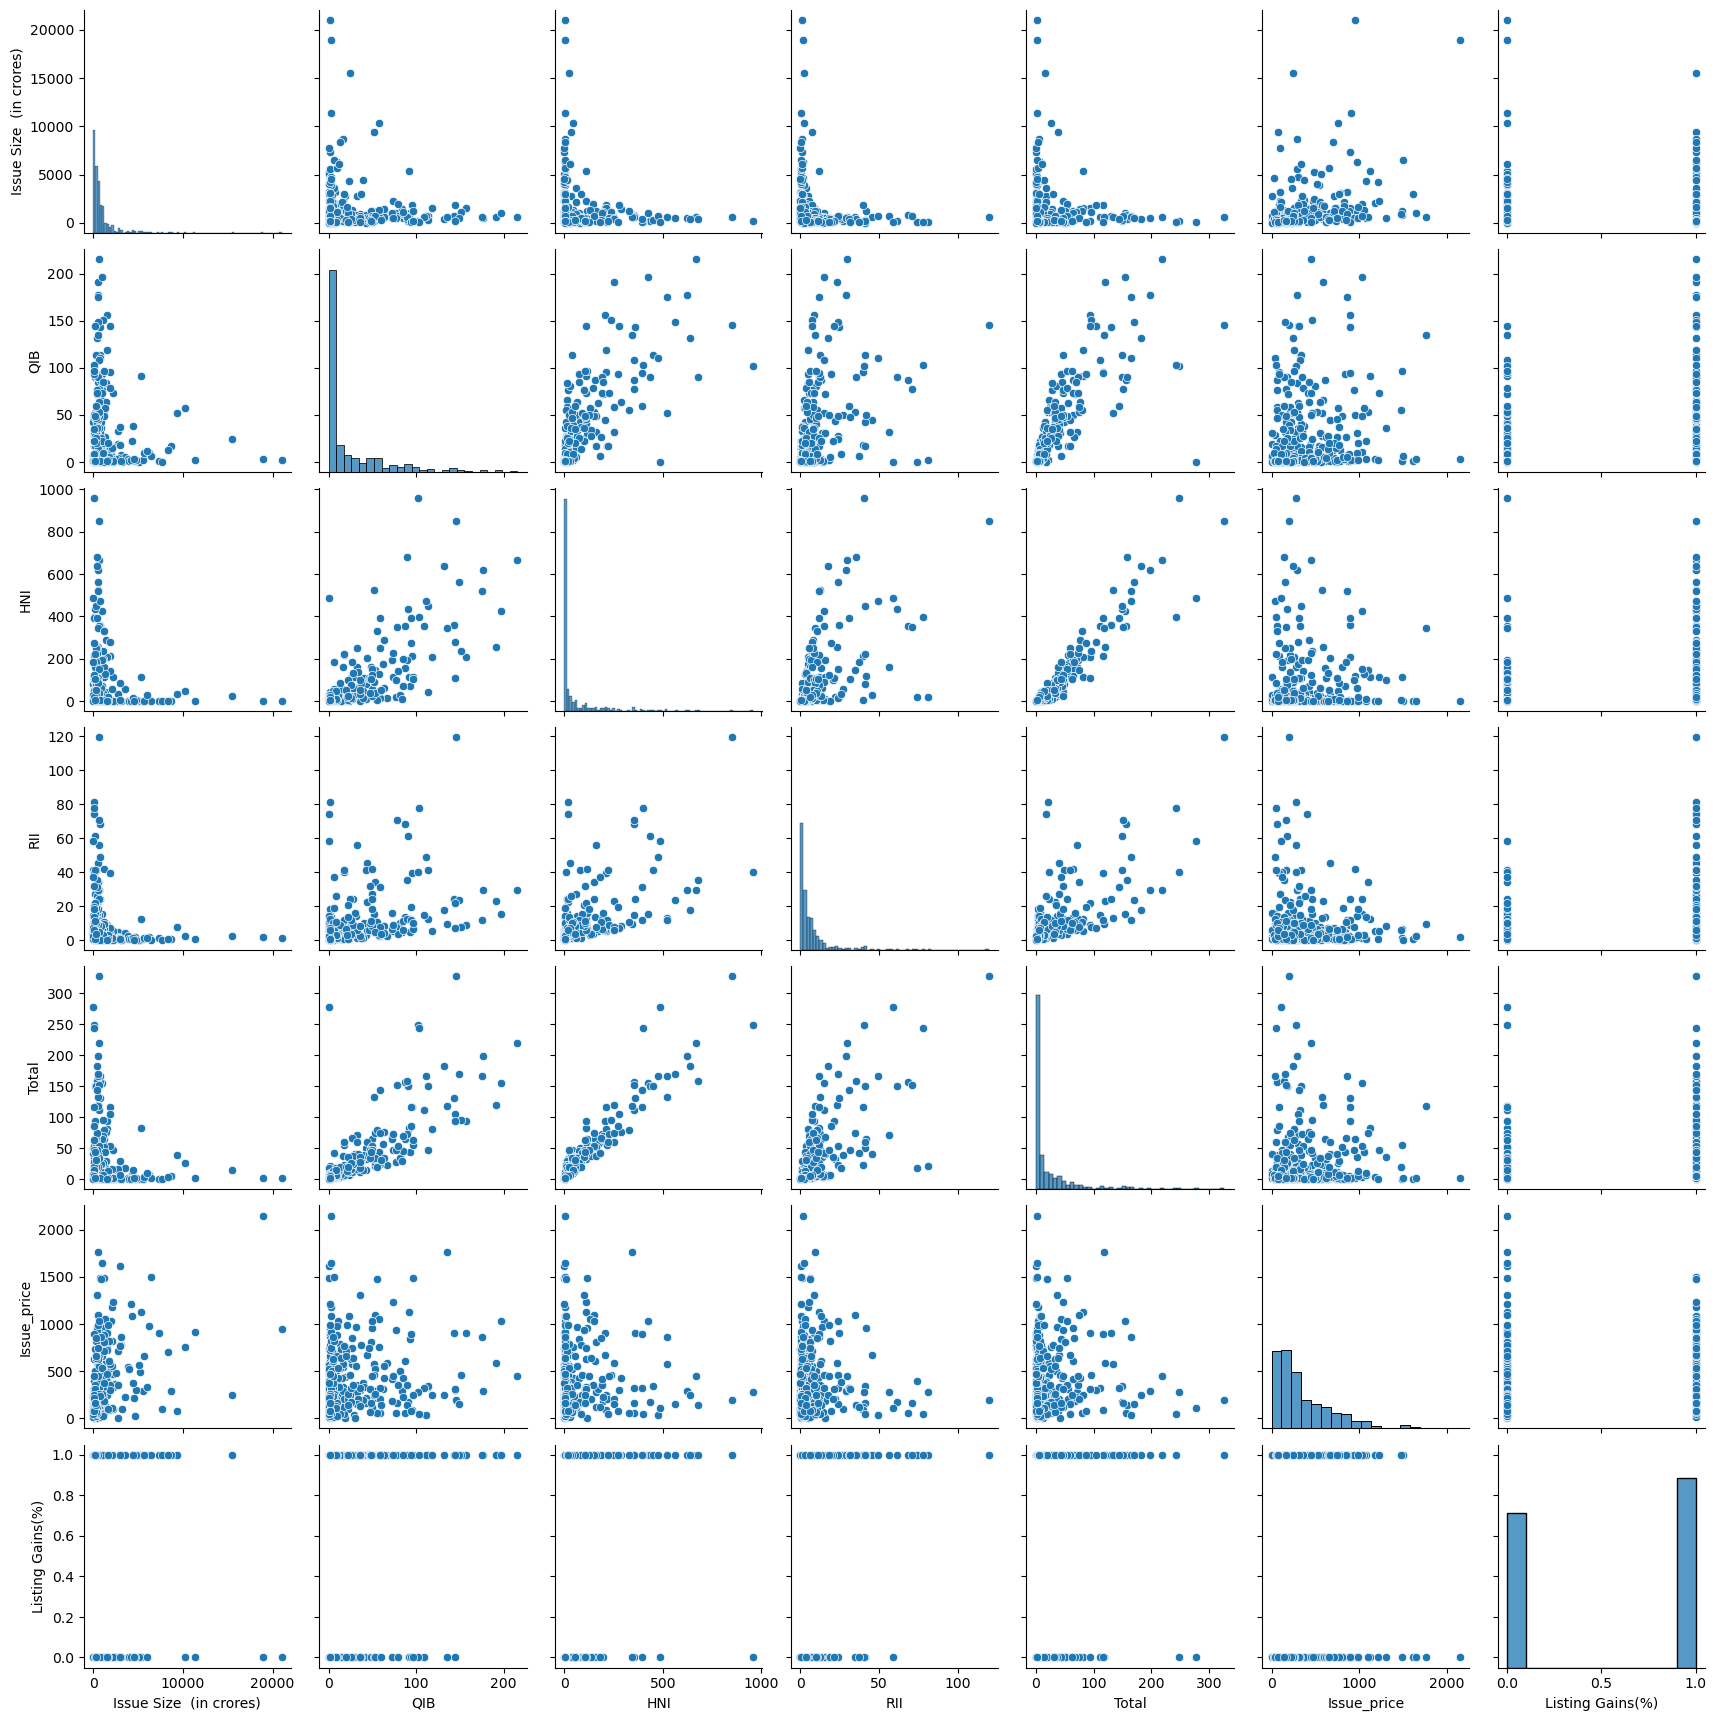

In [20]:
sns.pairplot(df)

<Axes: >

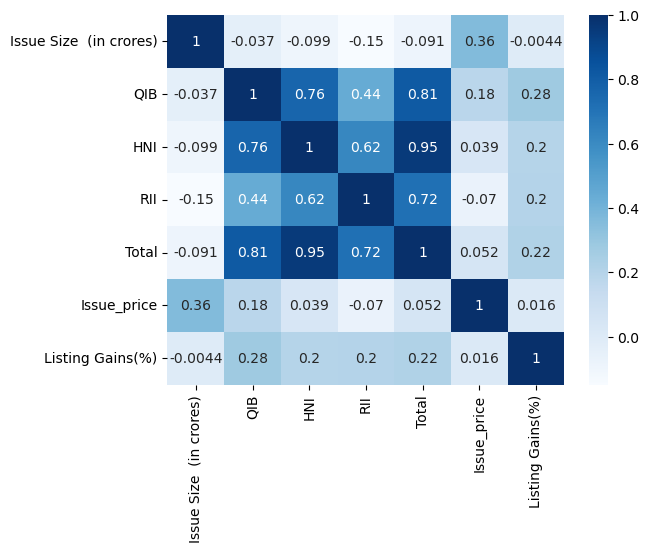

In [21]:
df_num = df[df.columns[df.dtypes != 'object']]
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

The numeric columns in the predictor values has larger skewness, and lots of outliers. And they are correlated with each other.

### Clean data
* Replace the outerlier: greater than upperbound, lower than lowerbound

In [22]:
stat = df_num.describe().T
stat['IQR'] = stat['75%'] - stat['25%']
stat['upper'] = stat['75%'] + 1.5*stat['IQR']
stat['lower'] = stat['25%'] - 1.5*stat['IQR']

In [23]:
for col in stat.index:
    col_upper = stat.T.loc['upper'][col]
    col_lower = stat.T.loc['lower'][col]
    df.loc[:, col] = df[col].clip(col_lower, col_upper)

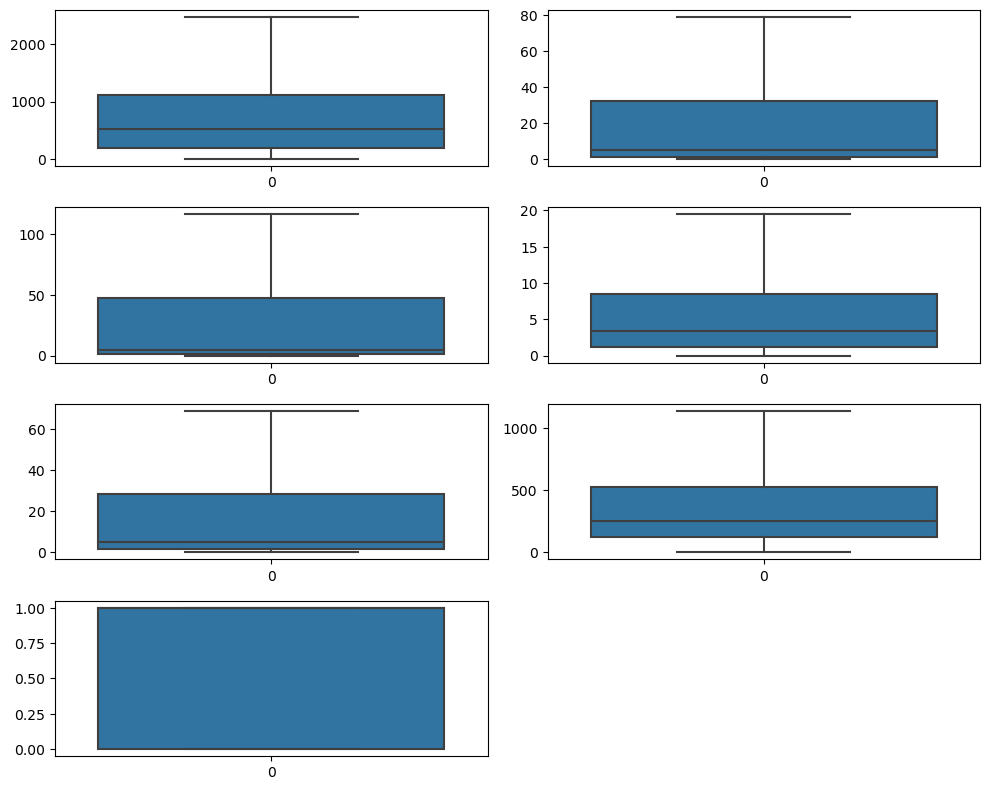

In [24]:
fig = plt.figure(figsize=(10, 8))

for i, col in enumerate(df.columns[df.dtypes != 'object']):
    fig.add_subplot(4, 2, i+1)
    sns.boxplot(df[col])
    
plt.tight_layout()

The outliers higher than upperbound were replaced with upperbound and lower than lowerbound with lowerbound. 

### Prepare data for training

In [25]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [26]:
df_object = df.columns[df.dtypes=='object']
df_object

Index(['Date', 'IPO Name'], dtype='object')

In [78]:
X = df.iloc[:, :-1].drop(columns=list(df_object), axis=1)
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_transformer = make_column_transformer((MinMaxScaler(), X.columns))


X_train_scaled = col_transformer.fit_transform(X_train)
X_test_scaled = col_transformer.transform(X_test)


print(X_train_scaled.shape)
print(X_test_scaled.shape)

(290, 6)
(73, 6)


### Training the model

#### Sequential API

In [97]:
# Define model

tf.random.set_seed(100)

model = keras.Sequential()
input_shape = (X.shape[1], )

model.add(layers.Dense(32, input_shape =input_shape, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# Compile and Train the Model
model.compile(optimizer=keras.optimizers.Adam(0.001),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

model.summary()
# Train the model
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)
model.fit(X_train_scaled, y_train, epochs=250, verbose=0)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 32)                224       
                                                                 
 dense_89 (Dense)            (None, 16)                528       
                                                                 
 dense_90 (Dense)            (None, 8)                 136       
                                                                 
 dense_91 (Dense)            (None, 4)                 36        
                                                                 
 dense_92 (Dense)            (None, 1)                 5         
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# Evaluate the model
print('Train data evaluation: ', model.evaluate(X_train_scaled, y_train))
print('Test data evaluation: ', model.evaluate(X_test_scaled, y_test))

10/10 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7276
Train data evaluation:  [0.5792520046234131, 0.7275862097740173]
3/3 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.6575
Test data evaluation:  [0.6312763690948486, 0.6575342416763306]


#### Functional API

In [111]:
input_layer = keras.Input(shape=input_shape)
hidden_layer_1 = layers.Dense(128, activation='relu')(input_layer)
drop1 = layers.Dropout(rate=0.40)(hidden_layer_1)

hidden_layer_2 = layers.Dense(64, activation='relu')(drop1)
drop2 = layers.Dropout(rate=0.20)(hidden_layer_2)

hidden_layer_2 = layers.Dense(32, activation='relu')(drop2)
drop3 = layers.Dropout(rate=0.2)(hidden_layer_2)

hidden_layer_3 = layers.Dense(16, activation='relu')(drop3)

output_layer = layers.Dense(1, activation='sigmoid')(hidden_layer_3)

model = keras.Model(inputs=input_layer, outputs=output_layer)

In [112]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=250, verbose=0)


In [113]:
# Evaluate the model
print('Train data evaluation: ', model.evaluate(X_train_scaled, y_train))
print('Test data evaluation: ', model.evaluate(X_test_scaled, y_test))

10/10 [==============================] - 1s 5ms/step - loss: 0.5258 - accuracy: 0.7310
Train data evaluation:  [0.5258294343948364, 0.7310344576835632]
3/3 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.6575
Test data evaluation:  [0.6927874088287354, 0.6575342416763306]


Function API and Sequential API has the same accuracy for the test data.